In [1]:
#pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Fight

## Dataframe

In [3]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\data.csv", sep=";");
df.head(10)

,Iter,Side,Status,Weapon,Type,Device,ACC,TargetWeapon,StartingState,Dmg,StateAfterHit,Morale,MoraleAfterHit,Distance
0,14,UA,HIT,Javelin,ATGM,FGM-148,0.99,BMP1,2000,230,1770,1.0,0.9,4500
1,15,UA,HIT,Javelin,ATGM,FGM-148,0.99,A1-CM,1770,0,1770,1.0,0.9,4400
2,16,UA,HIT,Javelin,ATGM,FGM-148,0.99,Akatsia,1770,230,1540,1.0,0.9,4300
3,17,UA,HIT,Javelin,ATGM,FGM-148,0.99,Squad,1540,0,1540,1.0,0.9,4200
4,18,UA,HIT,Javelin,ATGM,FGM-148,0.99,BMP1,1540,230,1310,0.9,0.8,4100
5,19,UA,HIT,Javelin,ATGM,FGM-148,0.99,Igla,1310,0,1310,1.0,0.9,4000
6,20,UA,HIT,Javelin,ATGM,FGM-148,0.99,T72B3,1310,230,1080,1.0,0.9,3900
7,21,UA,HIT,Javelin,ATGM,FGM-148,0.99,Squad,1080,0,1080,0.9,0.8,3800
8,22,UA,HIT,Javelin,ATGM,FGM-148,0.99,Microdrones,1080,0,1080,1.0,0.9,3700
9,23,UA,HIT,Javelin,ATGM,FGM-148,0.99,A1-CM,1080,0,1080,0.9,0.8,3600


## Weapon system hit / miss chart

In [4]:
df.groupby(['Side', 'Weapon', 'Device', 'Status']).size().reset_index(name='Occured').sort_values(['Weapon', 'Side', 'Status'], ascending=False)

,Side,Weapon,Device,Status,Occured
33,UA,T72B3,2A46,MISS,2
35,UA,T72B3,PKT,MISS,2
32,UA,T72B3,2A46,HIT,11
34,UA,T72B3,PKT,HIT,1
15,RU,T72B3,2A46,MISS,1
14,RU,T72B3,2A46,HIT,4
31,UA,Squad,PKM,MISS,5
30,UA,Squad,PKM,HIT,8
13,RU,Squad,PKM,MISS,7
12,RU,Squad,PKM,HIT,6


In [5]:
df.groupby(['Side', 'Type', 'Status']).size().reset_index(name='Occured').sort_values(['Side', 'Type', 'Status'], ascending=False)

,Side,Type,Status,Occured
21,UA,Tank,MISS,4
20,UA,Tank,HIT,12
19,UA,MLRS,MISS,2
18,UA,MLRS,HIT,1
17,UA,Infantry,MISS,5
16,UA,Infantry,HIT,8
15,UA,IFV,MISS,5
14,UA,IFV,HIT,2
13,UA,Drone,HIT,3
12,UA,Artillery,MISS,3


## Weapon fire per distance breakdown

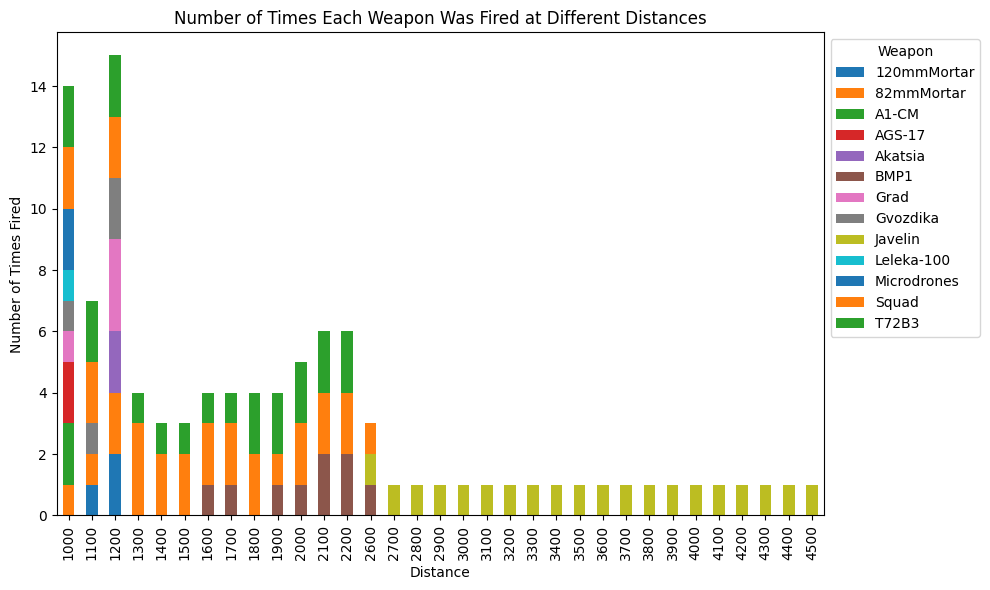

In [6]:
weapon_distance_counts = df.groupby(['Weapon', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Weapon', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Weapon Type by distance

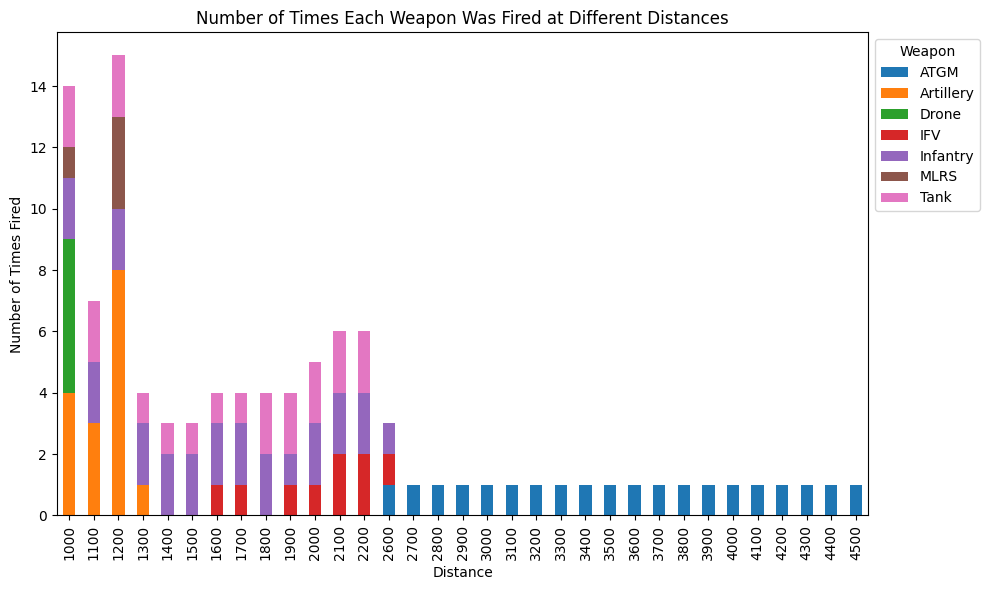

In [7]:
weapon_distance_counts = df.groupby(['Type', 'Distance']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Weapon' as columns
pivot_df = weapon_distance_counts.pivot(index='Distance', columns='Type', values='Count').fillna(0)

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distance')
ax.set_ylabel('Number of Times Fired')
ax.set_title('Number of Times Each Weapon Was Fired at Different Distances')
ax.legend(title='Weapon', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Battlegroups

In [8]:
df = pd.read_csv("d:\\Projects\\Dread\\Analysis\\battle_groups.csv", sep=";");

attacker = df[df["Attacking"] == 1]
defender = df[df["Attacking"] == 0]

alive_attacker = attacker[attacker["State"] > 0]
alive_defender = defender[defender["State"] > 0]

dead_attacker = attacker[attacker["State"] <= 0]
dead_defender = defender[defender["State"] <= 0]

df

,Iter,Distance,Attacking,Side,GroupIndex,WeaponDomain,Weapon,WeaponType,WeaponIndex,State,Armor
0,0,5900,1,RU,0,Ground,82mmMortar,Artillery,0,100,Soft
1,0,5900,1,RU,0,Ground,82mmMortar,Artillery,1,100,Soft
2,0,5900,1,RU,0,Ground,82mmMortar,Artillery,2,100,Soft
3,0,5900,1,RU,0,Ground,82mmMortar,Artillery,3,100,Soft
4,0,5900,1,RU,0,Ground,82mmMortar,Artillery,4,100,Soft
...,...,...,...,...,...,...,...,...,...,...,...
45245,49,1000,0,UA,0,Ground,T72B3,Tank,280,1180,Hard
45246,49,1000,0,UA,0,Ground,T72B3,Tank,281,1180,Hard
45247,49,1000,0,UA,0,Ground,T72B3,Tank,281,1180,Hard
45248,49,1000,0,UA,0,Ground,T72B3,Tank,282,1180,Hard


In [9]:
df["State"].unique()

array([  100,  2000,   200, 20000,  1200,  1770,  1540,  1310,  1080,
         850,   620,   390,   160,   -70,  -120, 19980,   600, 19960,
           0, 19680,   180, 19640,  -140, 19360, 19040, 19320, 18720,
       18400,   -80,  -130, 18080,   -20, 19000, 17760,  1180, 18980,
       17440], dtype=int64)

In [10]:
df["Distance"].unique()

array([5900, 5800, 5700, 5600, 5500, 5400, 5300, 5200, 5100, 5000, 4900,
       4800, 4700, 4600, 4500, 4400, 4300, 4200, 4100, 4000, 3900, 3800,
       3700, 3600, 3500, 3400, 3300, 3200, 3100, 3000, 2900, 2800, 2700,
       2600, 2500, 2400, 2300, 2200, 2100, 2000, 1900, 1800, 1700, 1600,
       1500, 1400, 1300, 1200, 1100, 1000], dtype=int64)

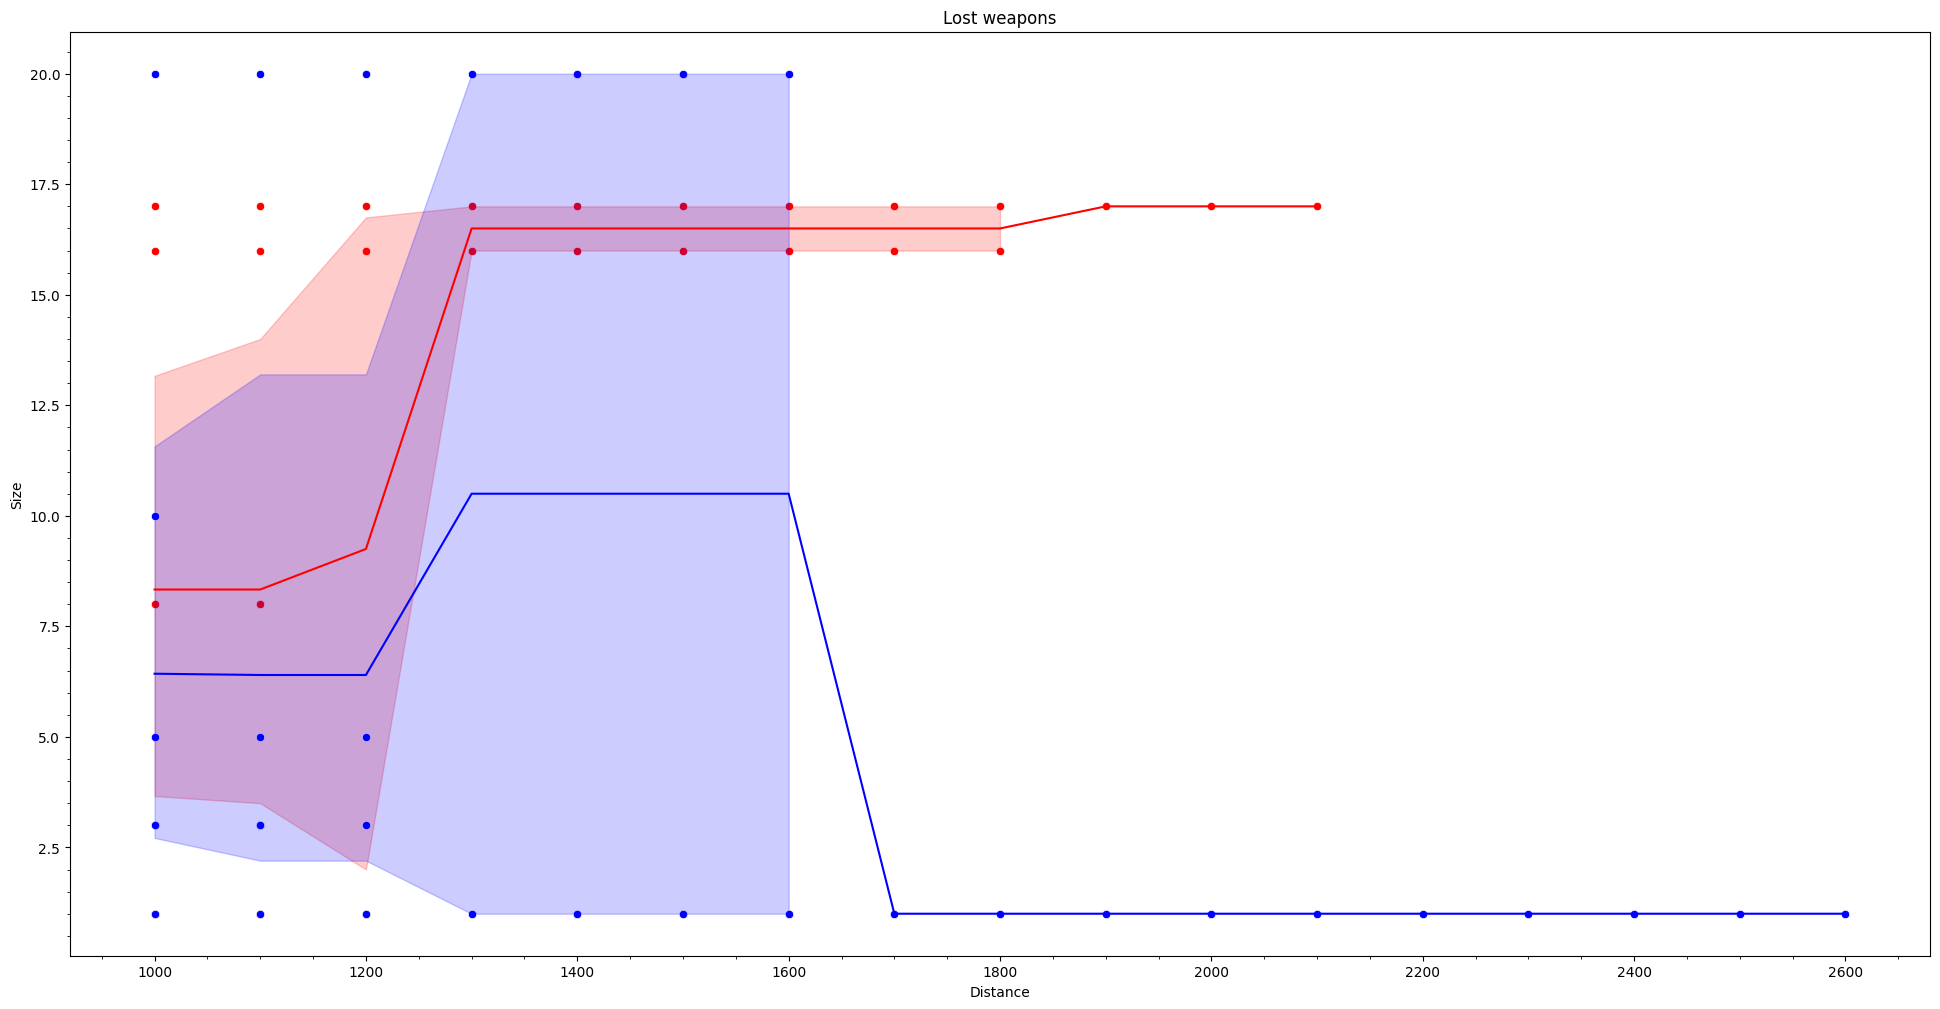

In [11]:
atk_grouped_dist = dead_attacker.groupby(["Distance", "Weapon"]).size().reset_index(name="Size")
def_grouped_dist = dead_defender.groupby(["Distance", "Weapon"]).size().reset_index(name="Size")

plt.figure(figsize=(24, 12))
plt.minorticks_on()
plt.title("Lost weapons");
sns.scatterplot(atk_grouped_dist, x="Distance", y="Size",color="RED")
sns.lineplot(atk_grouped_dist, x="Distance", y="Size",color="RED")
sns.scatterplot(def_grouped_dist, x="Distance", y="Size",color="BLUE")
sns.lineplot(def_grouped_dist, x="Distance", y="Size",color="BLUE")
plt.show()

<Axes: title={'center': 'Loses density'}, xlabel='Distance', ylabel='Density'>

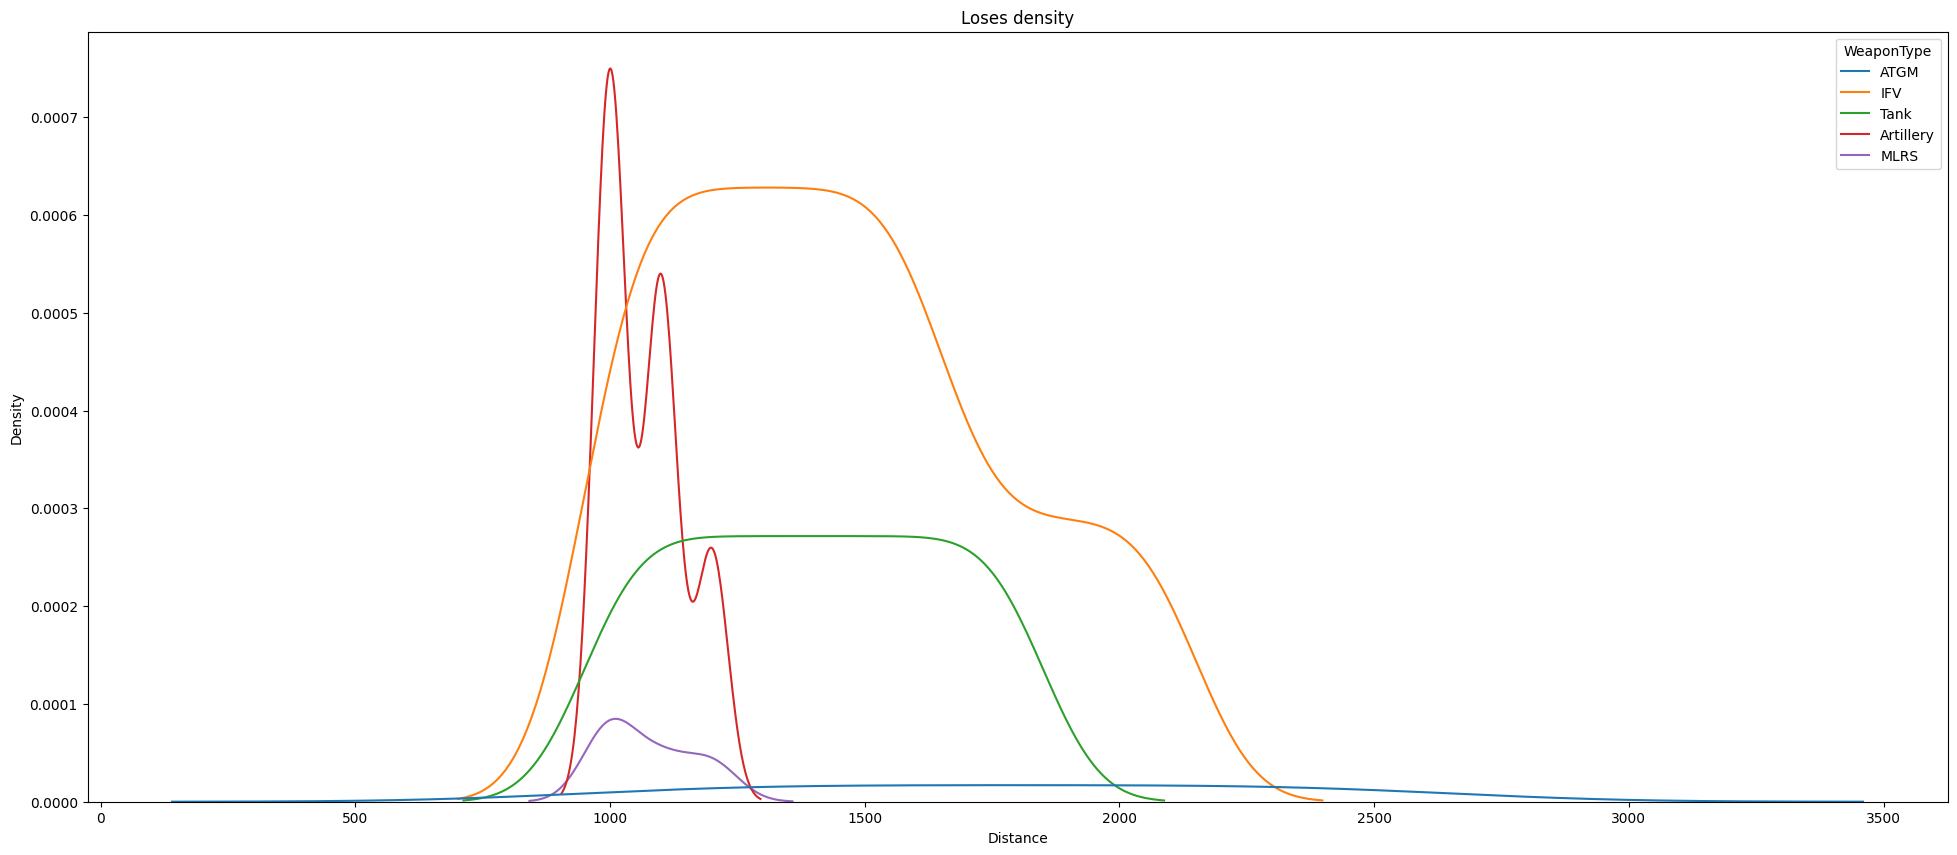

In [12]:
plt.figure(figsize=(24, 10))
lost = df[df['State'] <= 0]
plt.title("Loses density")
sns.kdeplot(lost, x="Distance",hue="WeaponType")